In [78]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

In [80]:
df_nyc = pd.read_csv("/Users/avaldivia/Documents/GitHub/Event-Aggregator/Web Scraper/Data/nyc-permitted-event-information.csv.zip")

In [85]:
df_nyc.shape

(21002, 12)

In [90]:
df_nyc['Event Borough'].value_counts()

Event Borough
Manhattan        8012
Brooklyn         5603
Queens           4656
Bronx            2147
Staten Island     584
Name: count, dtype: int64

In [82]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21002 entries, 0 to 21001
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Event ID             21002 non-null  int64 
 1   Event Name           21002 non-null  object
 2   Start Date/Time      21002 non-null  object
 3   End Date/Time        21002 non-null  object
 4   Event Agency         21002 non-null  object
 5   Event Type           21002 non-null  object
 6   Event Borough        21002 non-null  object
 7   Event Location       21002 non-null  object
 8   Event Street Side    641 non-null    object
 9   Street Closure Type  658 non-null    object
 10  Community Board      21001 non-null  object
 11  Police Precinct      21001 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


In [12]:
full_path = "/Users/avaldivia/Documents/GitHub/Event-Aggregator/Web Scraper/Data/games.csv"
df = pd.read_csv(filepath_or_buffer= full_path,index_col = 0)
df.head(n = 3)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K


In [93]:
df_nyc.head(n = 2)

,Event ID,Event Name,Start Date/Time,End Date/Time,Event Agency,Event Type,Event Borough,Event Location,Event Street Side,Street Closure Type,Community Board,Police Precinct
0,449943,Cortelyou Greenmarket Sunday,2019-01-06T08:00:00.000,2019-12-29T17:00:00.000,Street Activity Permit Office,Farmers Market,Brooklyn,CORTELYOU ROAD between RUGBY ROAD and ARGYLE ...,North,Sidewalk and Curb Lane Closure,"14,","70,"
1,449945,Columbia Greenmarket Thursday and Sunday,2019-01-03T08:00:00.000,2019-12-29T17:00:00.000,Street Activity Permit Office,Farmers Market,Manhattan,BROADWAY between WEST 114 STREET and WEST 1...,East,Sidewalk and Curb Lane Closure,"9,","26,"


In [13]:
def k_mapping(num: str) -> int:
    multiplier = 1
    l = num
    r = 0
    if 'K' in num:
        l = num[:-1]
        multiplier = 1_000
    
    if '.' in num:
        l , r = l.split('.')

    return int( (int(l) * multiplier) + (int(r) * (multiplier/10)) )

assert(k_mapping('3.9K')   == 3900.0)
assert(k_mapping('11.9K')  == 11_900.0)
assert(k_mapping('41K')    == 41000.0)
assert(k_mapping('400')    == 400.0)

In [14]:
df['Times Listed']      = df['Times Listed'].apply(func = k_mapping)
df['Number of Reviews'] = df['Number of Reviews'].apply(func = k_mapping)
df['Plays']             = df['Plays'].apply(func = k_mapping)
df['Playing']           = df['Playing'].apply(func = k_mapping)
df['Backlogs']          = df['Backlogs'].apply(func = k_mapping)
df['Wishlist']          = df['Wishlist'].apply(func = k_mapping)

In [15]:
date_map = lambda date: datetime.strptime(date,'%b %d, %Y').strftime(format = '%Y-%m-%d')
# Test lambda function
sample_date = 'Feb 25, 2022'
date_map(sample_date)

'2022-02-25'

In [16]:
# Remove all the rows that contains 'releases on TBD' as it messes with the mapping.
df = df[df['Release Date'] != 'releases on TBD']

In [17]:
df['Release Date'] = pd.to_datetime(df['Release Date'].apply(func = date_map))

In [18]:
#df['Genres'] = df['Genres'].apply(func = lambda l: eval(l))

In [19]:
df.head(n = 2)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600


In [20]:
s = {i for item in df['Genres'] for i in eval(item)}
print(len(s))
s

23


{'Adventure',
 'Arcade',
 'Brawler',
 'Card & Board Game',
 'Fighting',
 'Indie',
 'MOBA',
 'Music',
 'Pinball',
 'Platform',
 'Point-and-Click',
 'Puzzle',
 'Quiz/Trivia',
 'RPG',
 'Racing',
 'Real Time Strategy',
 'Shooter',
 'Simulator',
 'Sport',
 'Strategy',
 'Tactical',
 'Turn Based Strategy',
 'Visual Novel'}

In [62]:
df = df[df['Team'].apply(lambda x: isinstance(x,str))]
df.shape

In [72]:
df['Team'].value_counts()

Team
['Capcom']                                       35
['Square Enix']                                  31
['Nintendo', 'Nintendo EAD']                     19
['Nintendo']                                     19
['Nintendo', 'Game Freak']                       19
                                                 ..
['Square Enix', 'Disney Interactive Studios']     1
['3909', 'Lucas Pope']                            1
['BioWare', 'Microsoft Game Studios']             1
['Moon Studios', 'Xbox Game Studios']             1
['WB Games', 'TT Fusion']                         1
Name: count, Length: 762, dtype: int64

In [73]:
s = {i for item in df['Team'] for i in eval(item)}
print(len(s))

664


In [74]:
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300


<Axes: xlabel='Number of Reviews', ylabel='Count'>

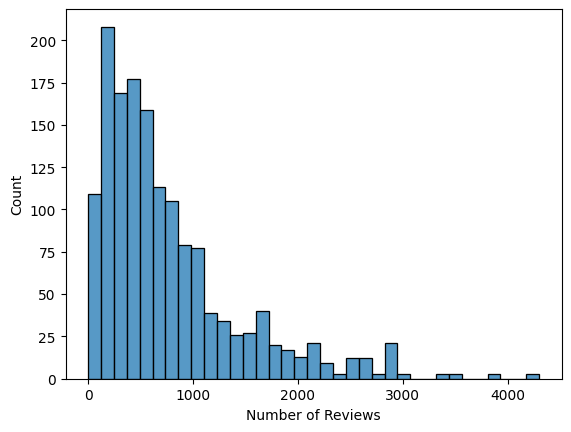

In [79]:
sns.histplot(data = df['Number of Reviews'])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              1508 non-null   object        
 1   Release Date       1508 non-null   datetime64[ns]
 2   Team               1508 non-null   object        
 3   Rating             1496 non-null   float64       
 4   Times Listed       1508 non-null   int64         
 5   Number of Reviews  1508 non-null   int64         
 6   Genres             1508 non-null   object        
 7   Summary            1508 non-null   object        
 8   Reviews            1508 non-null   object        
 9   Plays              1508 non-null   int64         
 10  Playing            1508 non-null   int64         
 11  Backlogs           1508 non-null   int64         
 12  Wishlist           1508 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 

In [50]:
# Apply One Hot encoding for each of the categories
for category in s:
    df[category] = df['Genres'].apply( func = lambda x: 1 if category in x else 0)

df.drop(labels=['Genres'],axis=1)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Summary,Reviews,Plays,Playing,...,Simulator,RPG,Arcade,Card & Board Game,Sport,Music,MOBA,Adventure,Indie,Tactical
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,...,0,1,0,0,0,0,0,1,0,0
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,...,0,1,0,0,0,0,0,1,1,0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,...,0,1,0,0,0,0,0,1,0,0
3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500,3500,"A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,...,0,1,0,0,0,0,0,1,1,0
4,Hollow Knight,2017-02-24,['Team Cherry'],4.4,3000,3000,A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,['Telltale Games'],3.2,94,94,Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,...,0,0,0,0,0,0,0,1,0,0
1508,Team Sonic Racing,2019-05-21,"['Sumo Digital', 'Sega']",2.9,264,264,Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500,49,...,0,0,1,0,0,0,0,0,0,0
1509,Dragon's Dogma,2012-05-22,['Capcom'],3.7,210,210,"Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100,45,...,0,1,0,0,0,0,0,0,0,0
1510,Baldur's Gate 3,2020-10-06,['Larian Studios'],4.1,165,165,"An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,...,0,1,0,0,0,0,0,1,0,1


In [55]:
df.head(n = 2)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,...,Simulator,RPG,Arcade,Card & Board Game,Sport,Music,MOBA,Adventure,Indie,Tactical
0,Elden Ring,2022-02-25,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,...,0,1,0,0,0,0,0,1,0,0
1,Hades,2019-12-10,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,...,0,1,0,0,0,0,0,1,1,0


In [62]:
df.iloc[:,13:]

<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 1511
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Shooter              1509 non-null   int64
 1   Real Time Strategy   1509 non-null   int64
 2   Fighting             1509 non-null   int64
 3   Racing               1509 non-null   int64
 4   Strategy             1509 non-null   int64
 5   Brawler              1509 non-null   int64
 6   Pinball              1509 non-null   int64
 7   Visual Novel         1509 non-null   int64
 8   Quiz/Trivia          1509 non-null   int64
 9   Platform             1509 non-null   int64
 10  Puzzle               1509 non-null   int64
 11  Turn Based Strategy  1509 non-null   int64
 12  Point-and-Click      1509 non-null   int64
 13  Simulator            1509 non-null   int64
 14  RPG                  1509 non-null   int64
 15  Arcade               1509 non-null   int64
 16  Card & Board Game    1509 non

In [66]:
inventory = pd.concat([df['Title'],df.iloc[:,13:] ], axis = 1)

In [69]:
inventory.head(n = 2)

,Title,Shooter,Real Time Strategy,Fighting,Racing,Strategy,Brawler,Pinball,Visual Novel,Quiz/Trivia,...,Simulator,RPG,Arcade,Card & Board Game,Sport,Music,MOBA,Adventure,Indie,Tactical
0,Elden Ring,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Hades,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [67]:
inventory.info()

        Title  Shooter  Real Time Strategy  Fighting  Racing  Strategy  \
0  Elden Ring        0                   0         0       0         0   
1       Hades        0                   0         0       0         0   

   Brawler  Pinball  Visual Novel  Quiz/Trivia  ...  Simulator  RPG  Arcade  \
0        0        0             0            0  ...          0    1       0   
1        1        0             0            0  ...          0    1       0   

   Card & Board Game  Sport  Music  MOBA  Adventure  Indie  Tactical  
0                  0      0      0     0          1      0         0  
1                  0      0      0     0          1      1         0  

[2 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 0 to 1511
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                1509 non-null   object
 1   Shooter              1509 non-null   int64 
 2   

In [70]:
#inventory.to_csv("/Users/avaldivia/Documents/GitHub/Event-Aggregator/Web Scraper/Data/video_games.csv")

In [11]:
l = df['Reviews'][0]
for item in eval(l):
    print(item)
    print()

The first playthrough of elden ring is one of the best eperiences gaming can offer you but after youve explored everything in the open world and you've experienced all of the surprises you lose motivation to go exploring on repeat playthroughs which takes a lot away from the replayability which is a very important thing for from games imo.

a replay solidified my love for elden ring. so easily my favorite game of all time. actually beating malenia this time was also an amazing feeling. i just love being in this world man its the greatest of all time

The game is absolutely beautiful, with so much to do. The replayability is crazy. And it never gets old with it too.

Took everything great about the Soulsborne games and make it 100% better.

I play with my overlevelled friend every time and we still fail sometimes (he’s on NG6), insanely difficult game lol
                     
                     gorgeous graphics, animations, everything about this game is so beautiful. deserves all th